# instalation

In [1]:
pip install mysql-connector-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# import mysql

In [2]:
import mysql.connector

In [3]:
mydb = mysql.connector.connect(
  host="localhost",  
  user="root",
  password="Chandrika@23",
  database="chandu"  
)

In [4]:
cursor=mydb.cursor()
cursor.execute("select * from salesdata")

rows = cursor.fetchall()
for row in rows:
    print(row) 

(1, 'CA-2016-152156', '2016-11-08', 'Second Class', 'Consumer', 'South', 'FUR-BO-10001798', 'Furniture', 'Bookcases', 'Bush Somerset Collection Bookcase', 261.96, 2, 0.0, 41.91)
(2, 'CA-2016-152156', '2016-11-08', 'Second Class', 'Consumer', 'South', 'FUR-CH-10000454', 'Furniture', 'Chairs', 'Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back', 731.94, 3, 0.0, 219.58)
(3, 'CA-2016-138688', '2016-06-12', 'Second Class', 'Corporate', 'West', 'OFF-LA-10000240', 'Office Supplies', 'Labels', 'Self-Adhesive Address Labels for Typewriters by Universal', 14.62, 2, 0.0, 6.87)
(4, 'US-2015-108966', '2015-10-11', 'Standard Class', 'Consumer', 'South', 'FUR-TA-10000577', 'Furniture', 'Tables', 'Bretford CR4500 Series Slim Rectangular Table', 957.58, 5, 0.45, -383.03)
(5, 'US-2015-108966', '2015-10-11', 'Standard Class', 'Consumer', 'South', 'OFF-ST-10000760', 'Office Supplies', 'Storage', "Eldon Fold 'N Roll Cart System", 22.37, 2, 0.2, 2.52)
(6, 'CA-2014-115812', '2014-06-09', 'Standard 

In [6]:
# Fetch column names
columns = [desc[0] for desc in cursor.description]

# Print the header (column names)
print(columns)

['Row ID', 'Order ID', 'Order Date', 'Ship Mode', 'Segment', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit']


In [7]:
cursor.execute("select `Ship Mode`,round(sum(Sales),2) as Sales from salesdata group by `Ship Mode`")
header = [col[0] for col in cursor.description]
print(header)
for row in cursor.fetchall():
    print(row)

['Ship Mode', 'Sales']
('Second Class', 2418.27)
('Standard Class', 16547.71)
('First Class', 2617.95)


In [8]:
cursor.execute("select Region,round(sum(Sales),2) as sales from salesdata group by Region order by sales")
header = [col[0] for col in cursor.description]
print(header)
for row in cursor.fetchall():
    print(row)

['Region', 'sales']
('South', 3890.5)
('Central', 5028.64)
('East', 5262.19)
('West', 7402.6)


In [9]:
cursor.execute("select year(`order date`) as year,round(sum(Sales)) as sales from salesdata group by year")
head= [col[0] for col in cursor.description]
print(head)

for i in cursor.fetchall():
    print(i)


['year', 'sales']
(2016, 5598.0)
(2015, 8638.0)
(2014, 6229.0)
(2017, 1119.0)


# Load into pandas

In [10]:
import pandas as pd

In [11]:
query = "select * from salesdata"
df=pd.read_sql(query,mydb)
print(df)

    Row ID        Order ID  Order Date       Ship Mode      Segment   Region  \
0        1  CA-2016-152156  2016-11-08    Second Class     Consumer    South   
1        2  CA-2016-152156  2016-11-08    Second Class     Consumer    South   
2        3  CA-2016-138688  2016-06-12    Second Class    Corporate     West   
3        4  US-2015-108966  2015-10-11  Standard Class     Consumer    South   
4        5  US-2015-108966  2015-10-11  Standard Class     Consumer    South   
..     ...             ...         ...             ...          ...      ...   
94      97  CA-2017-161018  2017-11-09    Second Class  Home Office     East   
95      98  CA-2017-157833  2017-06-17     First Class     Consumer     West   
96      99  CA-2016-149223  2016-09-06  Standard Class    Corporate  Central   
97     100  CA-2016-158568  2016-08-29  Standard Class  Home Office  Central   
98     101  CA-2016-158568  2016-08-29  Standard Class  Home Office  Central   

         Product ID         Category Su

C:\Users\nhari\AppData\Local\Temp\ipykernel_2660\3083892195.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql(query,mydb)


In [12]:
df

,Row ID,Order ID,Order Date,Ship Mode,Segment,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,Second Class,Consumer,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.00,41.91
1,2,CA-2016-152156,2016-11-08,Second Class,Consumer,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.00,219.58
2,3,CA-2016-138688,2016-06-12,Second Class,Corporate,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.00,6.87
3,4,US-2015-108966,2015-10-11,Standard Class,Consumer,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,5,0.45,-383.03
4,5,US-2015-108966,2015-10-11,Standard Class,Consumer,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37,2,0.20,2.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,97,CA-2017-161018,2017-11-09,Second Class,Home Office,East,FUR-FU-10000629,Furniture,Furnishings,9-3/4 Diameter Round Wall Clock,96.53,7,0.00,40.54
95,98,CA-2017-157833,2017-06-17,First Class,Consumer,West,OFF-BI-10001721,Office Supplies,Binders,Trimflex Flexible Post Binders,51.31,3,0.20,17.96
96,99,CA-2016-149223,2016-09-06,Standard Class,Corporate,Central,OFF-AP-10000358,Office Supplies,Appliances,Fellowes Basic Home/Office Series Surge Protec...,77.88,6,0.00,22.59
97,100,CA-2016-158568,2016-08-29,Standard Class,Home Office,Central,OFF-PA-10003256,Office Supplies,Paper,Avery Personal Creations Heavyweight Cards,64.62,7,0.20,22.62


# Plot simple bar chart

In [13]:
import matplotlib.pyplot as plt

In [14]:
df

,Row ID,Order ID,Order Date,Ship Mode,Segment,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,Second Class,Consumer,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.00,41.91
1,2,CA-2016-152156,2016-11-08,Second Class,Consumer,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.00,219.58
2,3,CA-2016-138688,2016-06-12,Second Class,Corporate,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.00,6.87
3,4,US-2015-108966,2015-10-11,Standard Class,Consumer,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,5,0.45,-383.03
4,5,US-2015-108966,2015-10-11,Standard Class,Consumer,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37,2,0.20,2.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,97,CA-2017-161018,2017-11-09,Second Class,Home Office,East,FUR-FU-10000629,Furniture,Furnishings,9-3/4 Diameter Round Wall Clock,96.53,7,0.00,40.54
95,98,CA-2017-157833,2017-06-17,First Class,Consumer,West,OFF-BI-10001721,Office Supplies,Binders,Trimflex Flexible Post Binders,51.31,3,0.20,17.96
96,99,CA-2016-149223,2016-09-06,Standard Class,Corporate,Central,OFF-AP-10000358,Office Supplies,Appliances,Fellowes Basic Home/Office Series Surge Protec...,77.88,6,0.00,22.59
97,100,CA-2016-158568,2016-08-29,Standard Class,Home Office,Central,OFF-PA-10003256,Office Supplies,Paper,Avery Personal Creations Heavyweight Cards,64.62,7,0.20,22.62


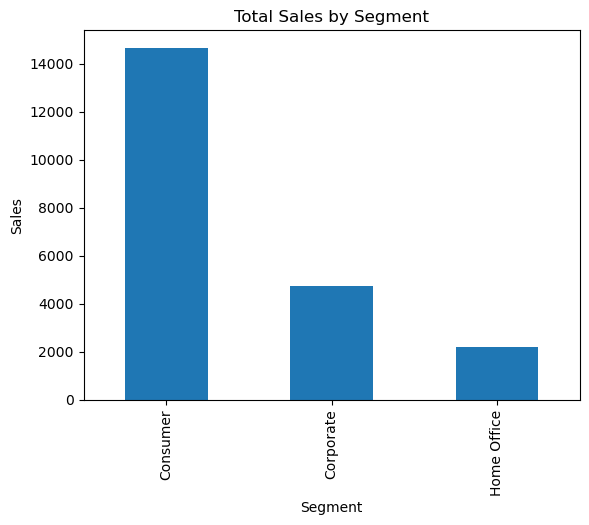

In [15]:
df.groupby("Segment")["Sales"].sum().plot(kind='bar')
plt.title("Total Sales by Segment")
plt.ylabel("Sales")
plt.show()

# Save chart 

In [16]:
plt.savefig("Segment_sales_chart.png")

<Figure size 640x480 with 0 Axes>

In [17]:
import os
print(os.path.exists("Segment_sales_chart.png"))

True


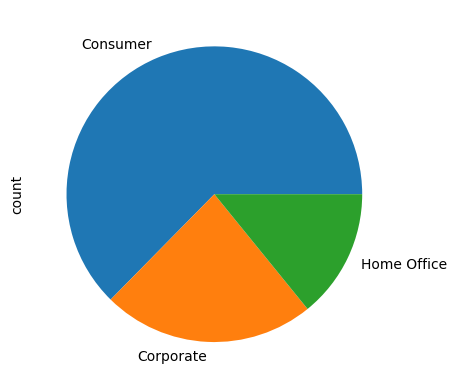

In [18]:
df["Segment"].value_counts().plot(kind = 'pie')
plt.savefig("Segment_sales_pie.png")
plt.show()

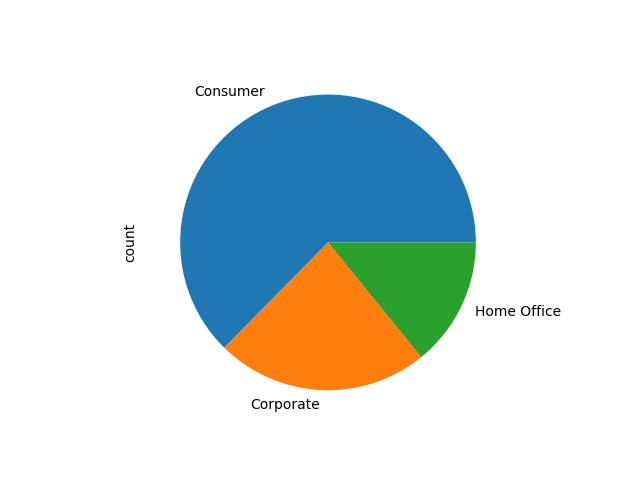

In [20]:
from IPython.display import Image, display
display(Image(filename="Segment_sales_pie.png"))

# find the file location

In [125]:
import os
print(os.getcwd())

C:\Users\nhari\Hari
